## Understanding the relation between data, predicting and fitting

Author: Isabelle Melo

Hi guys! Today I'm gonna show you a qualitative example of the difference between curve fitting and prediction. This is my homework for Introduction to Machine learning class at Federal University of Rio de Janeiro, and my task is to replicate patterns of figures 1.4 and 1.6 from "Pattern Recognition and Machine learning" - Christopher M. Bishop. Our deal here is to see what happens when we are trying to predict a noisy sine function. Will a curve fitting be sufficient to predict new unknown data points? What happens when we increase the avaliabe data to our problem? What if there is an outlier? 

What does learning mean? In machine learning context, we can say that learning is when your algorithm, somehow, finds patterns and correlation between your data and is capable of predicting, making inference, detections of anomaly and much more for new data. Basically, this system - using statistical methods - must learn data and have the power to generalize and predict for future data. 

An usual problem is when we have "noisy data". It's almost impossible to find a perfect dataset! Real world problems have messy data and the target function can be really difficult to learn. Fortunantely, we can try to find approximate models that describe these patterns. The goal is not finding the model that best fits the presented data, but the one that best generalizes for similar datasets.

In this exercise we are gonna make the inverse: secretly, I know the target function. It's been chosen to be $sin(2 \pi x)$. From this target we generate the plot using random x values between 0 and 1 (because of sine function) and then adding the resulting sine a gaussian noise. This is our noisy data! It's noisy because they don't perfectly generate a sine function, and we want to pretend we don't know the real target is sine. First, we pretend we just have this noisy data, and then fit it with different order polynomials. We are trying here order 0,1,3 and 9. Curve fitting method is based on finding a function such that you are modelling: \
$y(x, \vec{w}) = w_{0} + w_{1}x + ... + w_{M}x^{M}$  \
Where M is the order of the polynomial and $\vec{w}$ is the coefficient vector. The coeficientd can be found by minimizing error functions (yeah, least squares can be used!):  \
$E(\vec{w}) = \dfrac{1}{2} \sum\limits_{n=1}^{\mbox{N}}(y - t_{n} )^{2}$ \
Having N points, y is the model function at a specific value of x and t is target value. This difference tell us how good your model is fitting data. \
Although, we are gonna see now that fitting data is not really a good strategy to make predictions.

## Importing bibs 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import radians
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

## Experiment 1: Creating your plotter 

Set N as the number of sintetic data point, the plotter function will return 4 different plots: a fit for each polynomial order as indicated below

In [125]:
def plotter(N):
    
    
    random_float_list = []

    for i in range(0, N):
        x = round(random.uniform(0, 1), 2)
        radians(x)
        random_float_list.append(x)

    x = np.sort(np.array(random_float_list))
    

    x_seno = np.linspace(0,np.pi/3,100)
    y_seno = np.sin(2*np.pi*x_seno)
    noise = np.random.normal(0,0.3,N)
    y = np.sin(2*np.pi*x) + noise
   
    degree = [0,1,3,9]
    title = ['fit M = 0','fit M = 1', 'fit M=3', 'fit M=9']
    
    
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(20, 15)
    ind = 0

    for ax in axs.flat:
        t = np.linspace(0, np.pi/3, 100)
        model = np.poly1d(np.polyfit(x, y, degree[ind]))
        ax.scatter(x,y, marker = 'o', color = 'red', label = 'data')
        ax.plot(x_seno, y_seno, 'b-', label = 'y = f(x)')
        ax.plot(t, model(t), color = 'green', label = title[ind])
        ax.grid(True)
        ax.legend(loc='best')
        ind += 1

## Having some fun with your new plotter 

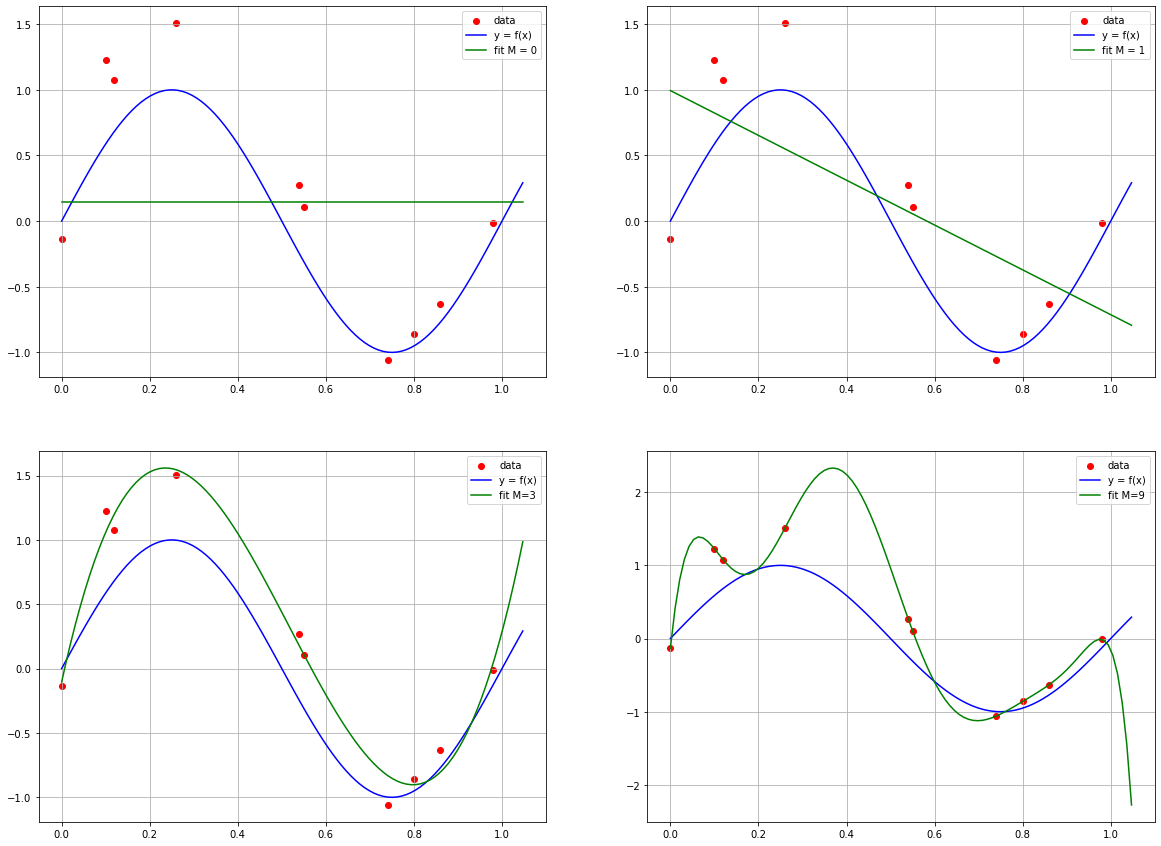

In [128]:
plotter(10)

Notice that for M = 0 and M = 1 we have an underfitting. This means the fit displayed here generalizes too much data, and is not capable of approximating well the target function. M = 3 gives a better estimate, and you could think that M = 9 would be even better! After all, a more complex model would fit  better data. That won't be true at all...seee: the fit overfitted data! This means that the model is great learning the specific pattern of points shown here, but won't be good enough to predict a new set of random sine noisy points. If you set an x point as, for example, 1.5, the M=9 fit says the target tends to - infinity! That's absurd and clearly not a good model to describe future data. 

What if we try if for 100 points?

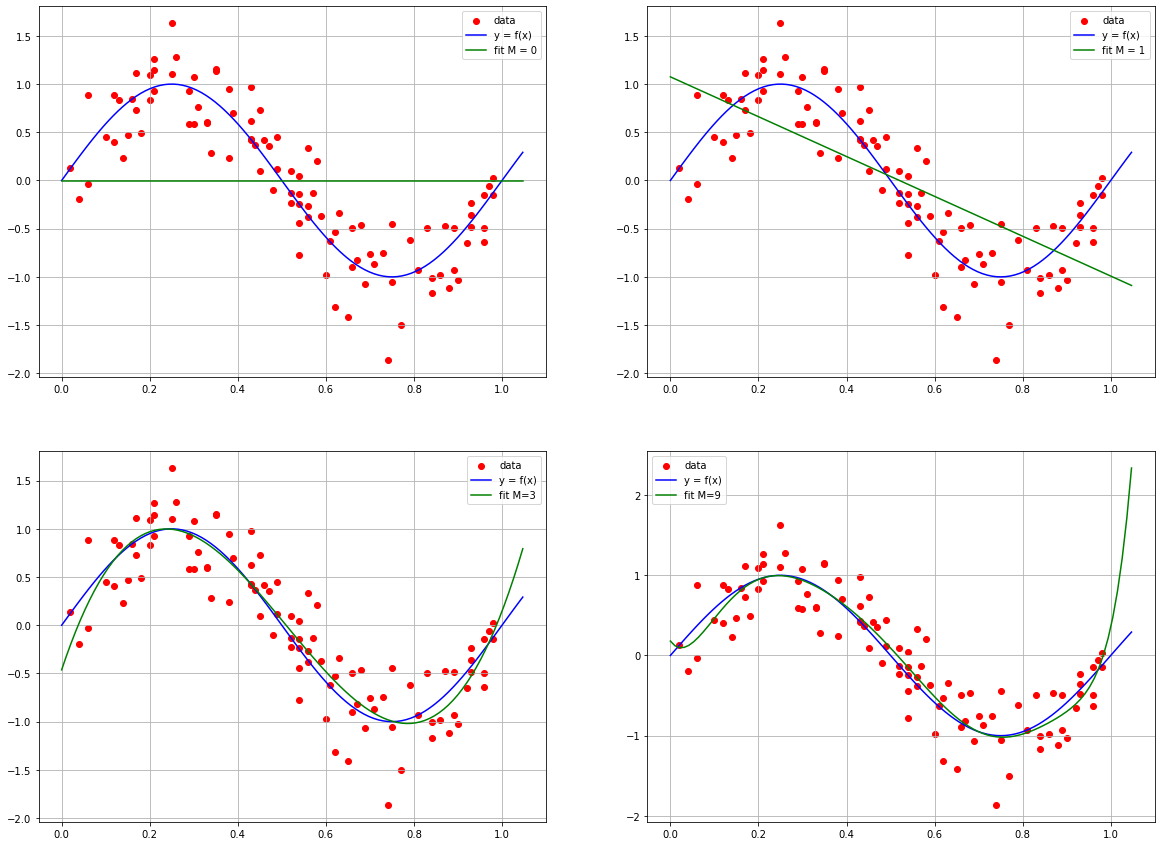

In [130]:
plotter(100)

Now we have a significant difference! What happened here? Increasing the size of data reduces overfitting. Why? Because we give more information to the system and it tends not to only memorize each point. An ideal scneario would be having infinity points, and then the fit would be perfect and a model not biased, but that's not what happens in real world problems. 

## Experiment 2: Creating a plotter with non-representative data

Let's try something different now. I'm gonna simulate a new list of points that are not representative at all for you sample. Set points now only defined between 0 and 0.3. Let's see what happen.

In [133]:
def plotter_simulate(N):
    
    
    random_float_list = []

    for i in range(0, N):
        x = round(random.uniform(0, 0.3), 2)
        radians(x)
        random_float_list.append(x)

    x = np.sort(np.array(random_float_list))
    

    x_seno = np.linspace(0,np.pi/3,100)
    y_seno = np.sin(2*np.pi*x_seno)
    noise = np.random.normal(0,0.3,N)
    y = np.sin(2*np.pi*x) + noise
   
    degree = [0,1,3,9]
    title = ['fit M = 0','fit M = 1', 'fit M=3', 'fit M=9']
    
    
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(20, 15)
    ind = 0

    for ax in axs.flat:
        t = np.linspace(0, np.pi/3, 100)
        model = np.poly1d(np.polyfit(x, y, degree[ind]))
        ax.scatter(x,y, marker = 'o', color = 'red', label = 'data')
        ax.plot(x_seno, y_seno, 'b-', label = 'y = f(x)')
        ax.plot(t, model(t), color = 'green', label = title[ind])
        ax.grid(True)
        ax.legend(loc='best')
        ind += 1

## Having some fun with your plotter

C:\Users\Isabelle\AppData\Local\Temp\ipykernel_7084\2481361934.py:1: RankWarning: Polyfit may be poorly conditioned
  plotter_simulate(10)


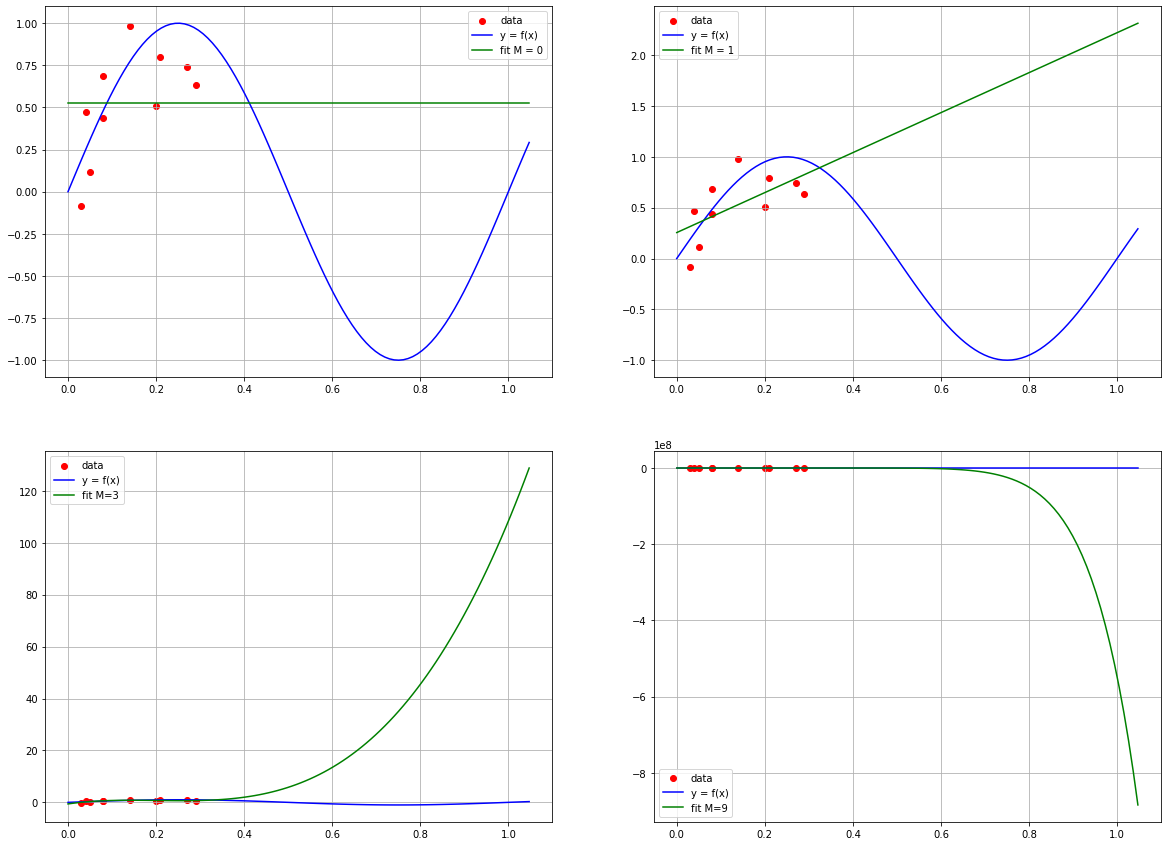

In [137]:
plotter_simulate(10)

As we can see here, for 10 points, M=3 fit is no longer a good predictor. It's important to notice that our data must be representative over a big sample. A not well distributed data set can induce a very biased model.

## Experiment 3: Creating a plotter with an outlier

In our last experiment we see what happens when we change a random point and define it as an outlier. Does it affect prediction and fitting? I set the last point as 10.

In [139]:
def plotter_outlier(N):
    
    
    random_float_list = []

    for i in range(0, N):
        x = round(random.uniform(0, 1), 2)
        radians(x)
        random_float_list.append(x)

    x = np.sort(np.array(random_float_list))
    

    x_seno = np.linspace(0,np.pi/3,100)
    y_seno = np.sin(2*np.pi*x_seno)
    noise = np.random.normal(0,0.3,N)
    y = np.sin(2*np.pi*x) + noise
    y[-1] = 10
   
    degree = [0,1,3,9]
    title = ['fit M = 0','fit M = 1', 'fit M=3', 'fit M=9']
    
    
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(20, 15)
    ind = 0

    for ax in axs.flat:
        t = np.linspace(0, np.pi/3, 100)
        model = np.poly1d(np.polyfit(x, y, degree[ind]))
        ax.scatter(x,y, marker = 'o', color = 'red', label = 'data')
        ax.plot(x_seno, y_seno, 'b-', label = 'y = f(x)')
        ax.plot(t, model(t), color = 'green', label = title[ind])
        ax.grid(True)
        ax.legend(loc='best')
        ind += 1

## Having some fun with your plotter 

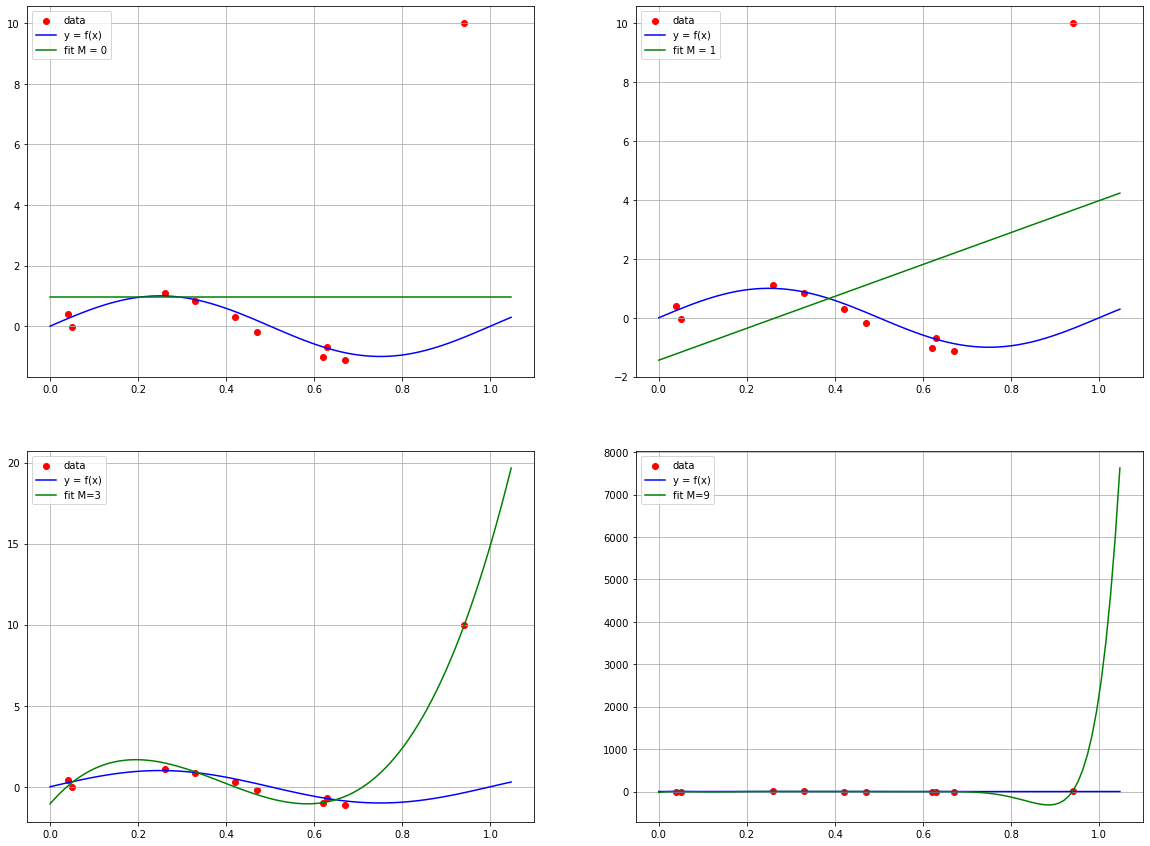

In [143]:
plotter_outlier(10)

Here we can see that the outlier influences the fit as the model tries to adapt to this distant point, and thus, the M = 3 model is no longer as good a candidate as the one in the simulation without the outlier, because in this model the fit has a tail that extends to the far point. Some machine learning algorithms are very sensitive to outliers, and sometimes it is necessary to treat the data before implementing a model. If there are few outliers out of the total amount of data, it may be useful to remove them.

Hope you enjoyed it! Feel free to replicate my code and play with your plotters, so you can have this initial mind-blow in machine learning. - And also, I hope my professor likes it and gives me a 10/10 :))

## References

[1] Pattern Recognition and Machine learning - Christopher M. Bishop \
[2] https://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html 

In [146]:
!python --version 

Python 3.9.12
